* problem statement : Analyzing the price of the car based on some important input features(brand,no of doors,capacity,fueltype,milage,no of cylinders)

### Importing the Libraries

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [281]:
df = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\car_df_EDA.csv")

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       208 non-null    int64  
 1   Unnamed: 0         208 non-null    int64  
 2   make               208 non-null    object 
 3   fuel_type          208 non-null    object 
 4   aspiration         208 non-null    object 
 5   num_of_doors       208 non-null    object 
 6   body_style         208 non-null    object 
 7   drive_wheels       208 non-null    object 
 8   engine_location    208 non-null    object 
 9   wheel_base         206 non-null    float64
 10  length             208 non-null    float64
 11  width              208 non-null    float64
 12  height             208 non-null    float64
 13  curb_weight        208 non-null    int64  
 14  engine_type        207 non-null    object 
 15  num_of_cylinders   208 non-null    object 
 16  engine_size        206 non

In [283]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000
mean,103.456731,104.456731,98.919903,174.262019,65.950962,53.750481,2563.375000,127.543689,10.194808,25.158654,30.668269
std,60.115573,60.115573,6.121266,12.373790,2.159419,2.435010,521.034018,41.599197,4.044135,6.528187,6.873639
min,0.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.750000,52.750000,94.500000,166.675000,64.100000,52.000000,2163.000000,98.000000,8.600000,19.000000,25.000000
50%,103.500000,104.500000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,9.000000,24.000000,30.000000
75%,155.250000,156.250000,102.400000,183.775000,66.900000,55.500000,2959.250000,145.000000,9.400000,30.000000,34.000000
max,204.000000,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Data cleaning

### Duplicate values

In [284]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [285]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1,inplace=True)

In [286]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [287]:
df.duplicated().sum()

3

In [288]:
df[df.duplicated()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
205,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,six,173.0,mpfi,8.8,134,5500,18,23,21485
206,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN
207,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,four,141.0,mpfi,9.5,114,5400,19,25,22625


In [289]:
df.drop_duplicates(keep='first',inplace=True)

In [290]:
df.duplicated().sum()

0

### structural errors

In [291]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [292]:
df['make'].dtype #checking the data type of 'make'

dtype('O')

In [293]:
df['make'].unique() #checking the sturctural errors of 'make'

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [294]:
df['fuel_type'].dtype #checking the data type of 'fuel_type'

dtype('O')

In [295]:
df['fuel_type'].unique() #checking the sturctural errors of 'fuel_type'

array(['gas', 'diesel'], dtype=object)

In [296]:
df['aspiration'].dtype #checking the data type of 'aspiration'

dtype('O')

In [297]:
df['aspiration'].unique() #checking the sturctural errors of 'aspiration'

array(['std', 'turbo'], dtype=object)

In [298]:
df['num_of_doors'].dtype #checking the data type of 'num_of_doors'

dtype('O')

In [299]:
df['num_of_doors'].unique() #checking the sturctural errors of 'num_of_doors'

array(['two', 'four', '?'], dtype=object)

In [300]:
def doors(n):
    if n== 'two':
        return 2
    elif n=='four':
        return 4
    else:
        return np.nan

In [301]:
df['num_of_doors']=df['num_of_doors'].apply(doors)

In [302]:
df['num_of_doors'].unique()

array([ 2.,  4., nan])

In [303]:
df['body_style'].dtype #checking the data type of 'body_style'

dtype('O')

In [304]:
df['body_style'].unique() #checking the sturctural errors of 'body_style'

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [305]:
df['drive_wheels'].dtype #checking the data type of 'drive_wheels'

dtype('O')

In [306]:
df['drive_wheels'].unique() #checking the sturctural errors of 'drive_wheels'

array(['rwd', 'fwd', '4wd'], dtype=object)

In [307]:
df['engine_location'].dtype #checking the data type of 'engine_location'

dtype('O')

In [308]:
df['engine_location'].unique() #checking the sturctural errors of 'engine_location'

array(['front', 'rear'], dtype=object)

In [309]:
df['wheel_base'].dtype #checking the data type of 'wheel_base'

dtype('float64')

In [310]:
df['wheel_base'].unique() #checking the sturctural errors of 'wheel_base'

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2,   nan, 103.5,
       110. ,  88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. ,
       113. , 102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6,
       120.9, 112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,
        99.2, 107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,
        97. ,  96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [311]:
df['length'].dtype #checking the data type of 'length'

dtype('float64')

In [312]:
df['length'].unique() #checking the sturctural errors of 'length'

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [313]:
df['width'].dtype #checking the data type of 'width'

dtype('float64')

In [314]:
df['width'].unique() #checking the sturctural errors of 'width'

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [315]:
df['height'].dtype #checking the data type of 'height'

dtype('float64')

In [316]:
df['height'].unique() #checking the sturctural errors of 'height'

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [317]:
df['curb_weight'].dtype #checking the data type of 'curb_weight'

dtype('int64')

In [318]:
df['curb_weight'].unique() #checking the sturctural errors of 'curb_weight'

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [319]:
df['engine_type'].dtype #checking the data type of 'engine_type'

dtype('O')

In [320]:
df['engine_type'].unique() #checking the sturctural errors of 'engine_type'

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', nan, 'ohcf', 'dohcv'],
      dtype=object)

In [321]:
df['num_of_cylinders'].dtype #checking the data type of 'num_of_cylinders'

dtype('O')

In [322]:
df['num_of_cylinders'].unique() #checking the sturctural errors of 'num_of_cylinders'

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [323]:
def cylinders(n):
    if n=='two':
        return 2
    elif n=='three':
        return 3
    elif n=='four':
        return 4
    elif n=='five':
        return 5
    elif n=='six':
        return 6
    elif n=='eight':
        return 8
    else:
        return 12

In [324]:
df['num_of_cylinders']=df['num_of_cylinders'].apply(cylinders)

In [325]:
df['num_of_cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [326]:
df['engine_size'].dtype #checking the data type of 'engine_size'

dtype('float64')

In [327]:
df['engine_size'].unique() #checking the sturctural errors of 'engine_size'

array([130., 152., 109., 136., 131., 108., 164., 209.,  61.,  90.,  98.,
       122., 156.,  92.,  79., 110.,  nan, 111., 119., 258., 326.,  91.,
        70.,  80., 140., 134., 183., 234., 308., 304.,  97., 103., 120.,
       181., 151., 194., 203., 132., 121., 146., 171., 161., 141., 173.,
       145.])

In [328]:
df['fuel_system'].dtype #checking the data type of 'fuel_system'

dtype('O')

In [329]:
df['fuel_system'].unique() #checking the sturctural errors of 'fuel_system'

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [330]:
df['compression_ratio'].dtype #checking the data type of 'compression_ratio'

dtype('float64')

In [331]:
df['compression_ratio'].unique() #checking the sturctural errors of 'compression_ratio'

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [332]:
df['horsepower'].dtype #checking the data type of 'horsepower'

dtype('O')

In [333]:
df['horsepower'].unique() #checking the sturctural errors of 'horsepower'

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [334]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [335]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [336]:
df['peak_rpm'].dtype #checking the data type of 'peak_rpm'

dtype('O')

In [337]:
df['peak_rpm'].unique() #checking the sturctural errors of 'peak_rpm'

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [338]:
df['peak_rpm']=df['peak_rpm'].replace('?',np.nan)

In [339]:
df['peak_rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [340]:
df['city_mpg'].dtype #checking the data type of 'city_mpg'

dtype('int64')

In [341]:
df['city_mpg'].unique() #checking the sturctural errors of 'city_mpg'

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [342]:
df['highway_mpg'].dtype #checking the data type of 'highway_mpg'

dtype('int64')

In [343]:
df['highway_mpg'].unique() #checking the sturctural errors of 'highway_mpg'

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

In [344]:
df['price'].dtype #checking the data type of 'price'

dtype('O')

In [345]:
df['price'].unique() #checking the sturctural errors of 'price'

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', nan, '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '170

In [346]:
df['price']=df['price'].replace('?',np.nan)

In [347]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '17075',


In [348]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

### Missing values

In [350]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [351]:
df['num_of_doors'].fillna(df['num_of_doors'].median(),inplace=True)
df['wheel_base'].fillna(df['wheel_base'].median(),inplace=True)
df['engine_type'].fillna(df['engine_type'].mode()[0],inplace=True)
df['engine_size'].fillna(df['engine_size'].median(),inplace=True)
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)
df['peak_rpm'].fillna(df['peak_rpm'].median(),inplace=True)
df['price'].fillna(df['price'].median(),inplace=True)

In [352]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### visualization

In [353]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

### Type conversion

In [354]:
df["price"] = df["price"].astype("int64")
df["peak_rpm"] = df["peak_rpm"].astype("int64")
df["horsepower"] = df["horsepower"].astype("int64")

In [355]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

## Univariate

In [ ]:
numerical - histogram, box plot, density plot
categorical - count plot, bar plot, pie 

#### categorical

### make

<Axes: title={'center': 'Bar plot of make'}, xlabel='make'>

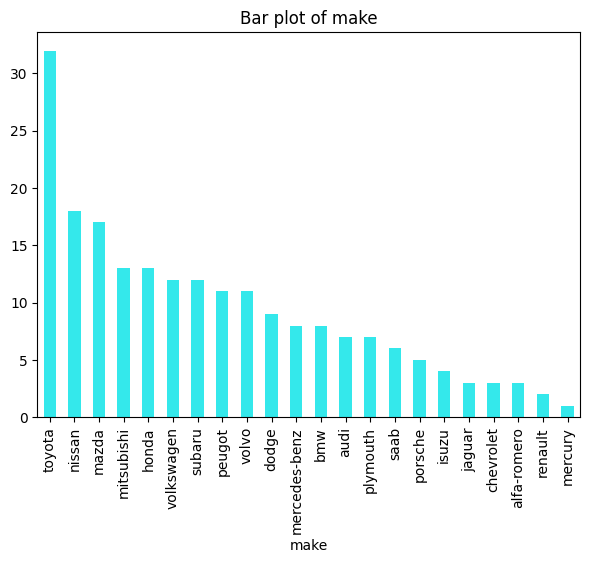

In [359]:
df['make'].value_counts().plot(kind='bar',figsize=(7,5),color='#34e8eb',title='Bar plot of make')

### conclusion
* In our dataset, we have 30 cars of toyota with highest frequency
* Lowest cars is mercury of with 2
* mitsunishi and honda has same number of cars
* volkswagen and subaru has same number of cars
* peugot and volvo has same number of cars
* jaguar,chevrolet,alfa-romero has same number of cars

### fuel type

In [361]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [362]:
plt.style.use('ggplot')

<Axes: xlabel='fuel_type', ylabel='count'>

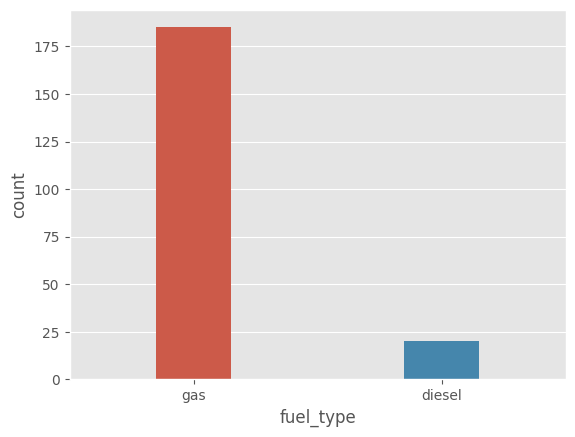

In [363]:
sns.countplot(data=df,x=df['fuel_type'],width=0.3)

### conclusion
* In our dataset, more cars are working with gas than diesel
* 190 cars are running with gas
* 20 cars are running with diesel

### aspiration

<Axes: title={'center': 'pie chart of aspiration'}, ylabel='percentage'>

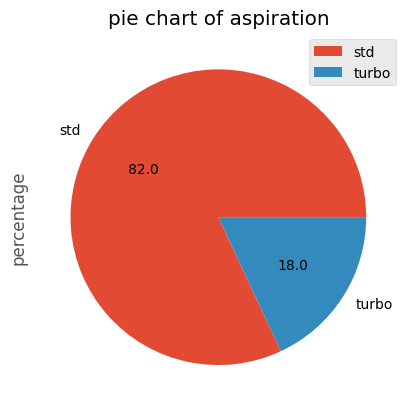

In [365]:
df['aspiration'].value_counts().plot(kind='pie',autopct='%1.1f',ylabel='percentage',legend=True,title='pie chart of aspiration')

#### Numerical

### num of doors

<Axes: ylabel='Frequency'>

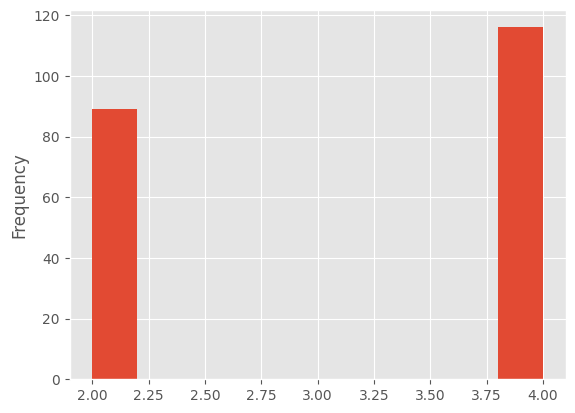

In [367]:
df['num_of_doors'].plot(kind='hist')

<Axes: ylabel='Density'>

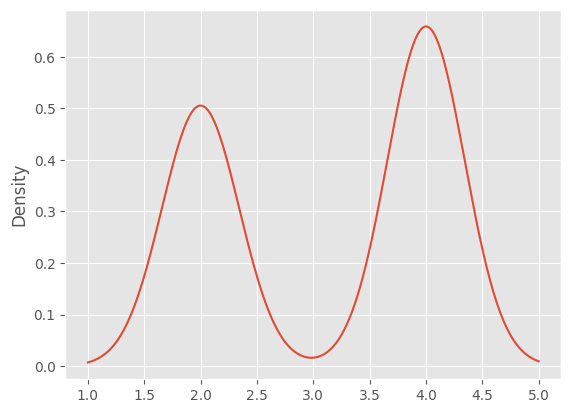

In [368]:
df['num_of_doors'].plot(kind='density')

<Axes: >

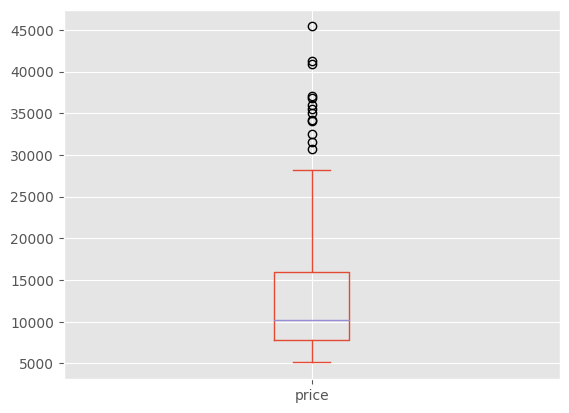

In [379]:
df['price'].plot(kind='box')

In [ ]:
* In our data set, the min price is 5000us dollars
* max price is 28000 
* It is not following normal distribution
* The length of the whisker is not equal and median is not in the middle of the box
* There are outliers in the data 

## Bivariate

### 1.categorical & categorical

In [369]:
pd.crosstab(df['fuel_system'],(df['body_style']))

body_style,convertible,hardtop,hatchback,sedan,wagon
fuel_system,,,,,
1bbl,0,0,7,3,1
2bbl,0,1,28,28,9
4bbl,0,0,3,0,0
idi,0,1,1,15,3
mfi,0,0,1,0,0
mpfi,6,6,22,48,12
spdi,0,0,7,2,0
spfi,0,0,1,0,0


* In sedan bodystyle the highest using fuel system is mpfi
* The lowest using bodystyle is wagon with 1bbl fuel system and 2bbl with hardtop

<Axes: xlabel='body_style', ylabel='count'>

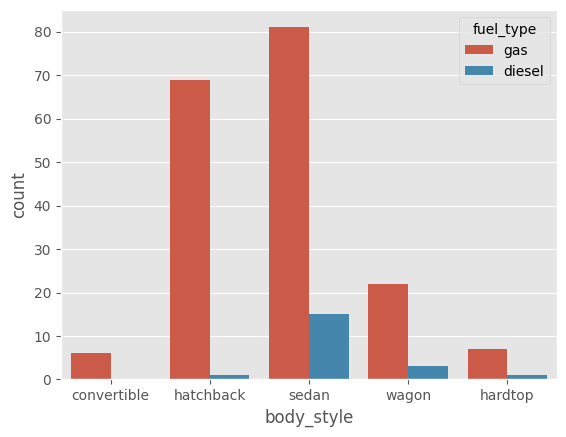

In [370]:
sns.countplot(data=df,x='body_style',hue='fuel_type') #hue means y-axis

<BarContainer object of 5 artists>

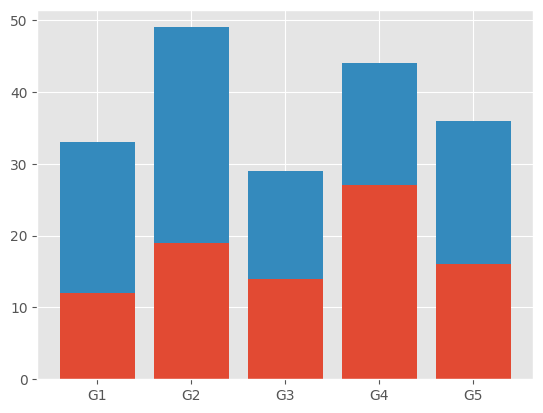

In [371]:
#Data
groups = ['G1','G2','G3','G4','G5'] #G1=male[0]+female[0],G1=12+21=33
male = [12,19,14,27,16]
female=[21,30,15,17,20]
fig, ax = plt.subplots()
#staked bar chart
ax.bar(groups,male)
ax.bar(groups,female,bottom=male)  #bottom = the values which we want to represent in the bottom
#plt.show()

### categorical & Numerical

In [372]:
df.groupby(by='engine_type')['price'].mean()

engine_type
dohc     16280.666667
dohcv    10221.000000
l        14071.000000
ohc      11457.304054
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64

<Axes: >

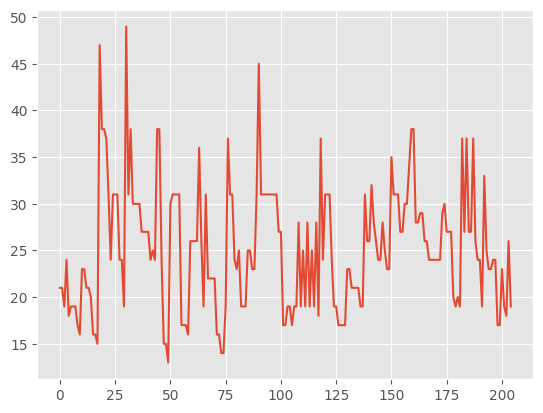

In [373]:
df['city_mpg'].plot(kind='line')

### Numerical & Numerical

<Axes: xlabel='wheel_base', ylabel='length'>

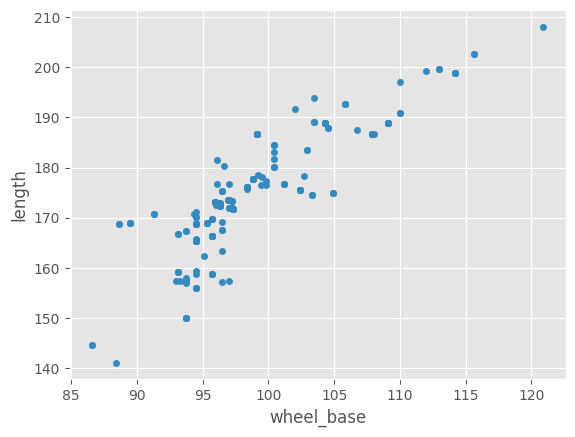

In [374]:
df.plot('wheel_base','length',kind='scatter')

* It shows the relation is positive
* And it is strong

In [375]:
df.corr(numeric_only=True)

,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
num_of_doors,1.000000,0.434334,0.385675,0.197735,0.540286,0.190720,-0.019503,0.017968,0.171797,-0.127846,-0.240473,-0.014271,-0.037452,0.024790
wheel_base,0.434334,1.000000,0.871674,0.795635,0.586421,0.775265,0.340349,0.567020,0.250870,0.351295,-0.364688,-0.467683,-0.541314,0.539636
length,0.385675,0.871674,1.000000,0.841118,0.491029,0.877728,0.430672,0.682920,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.656605
width,0.197735,0.795635,0.841118,1.000000,0.279210,0.867032,0.545007,0.733872,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.697846
height,0.540286,0.586421,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067997,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.137638
curb_weight,0.190720,0.775265,0.877728,0.867032,0.295572,1.000000,0.609727,0.847806,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.778674
num_of_cylinders,-0.019503,0.340349,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846195,-0.020002,0.691832,-0.124883,-0.445837,-0.466666,0.662176
engine_size,0.017968,0.567020,0.682920,0.733872,0.067997,0.847806,0.846195,1.000000,0.027709,0.808253,-0.244136,-0.651693,-0.674912,0.824423
compression_ratio,0.171797,0.250870,0.158414,0.181129,0.261214,0.151362,-0.020002,0.027709,1.000000,-0.204851,-0.436441,0.324701,0.265201,0.044758
horsepower,-0.127846,0.351295,0.553337,0.641337,-0.109286,0.750927,0.691832,0.808253,-0.204851,1.000000,0.130565,-0.802170,-0.770780,0.738562


* it gives the correlation values

### Multi variate 

<Axes: >

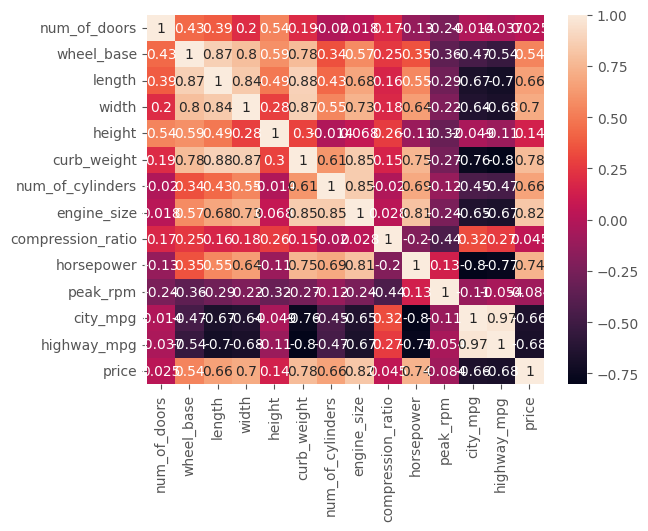

In [376]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### conclusion
* In every heat map, same column with that column has positive strong correlation
* The relation between wheel base and car length is positve, if wheel base increases length of the car increases
* The relation is strong

C:\Users\CHARISHMA\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


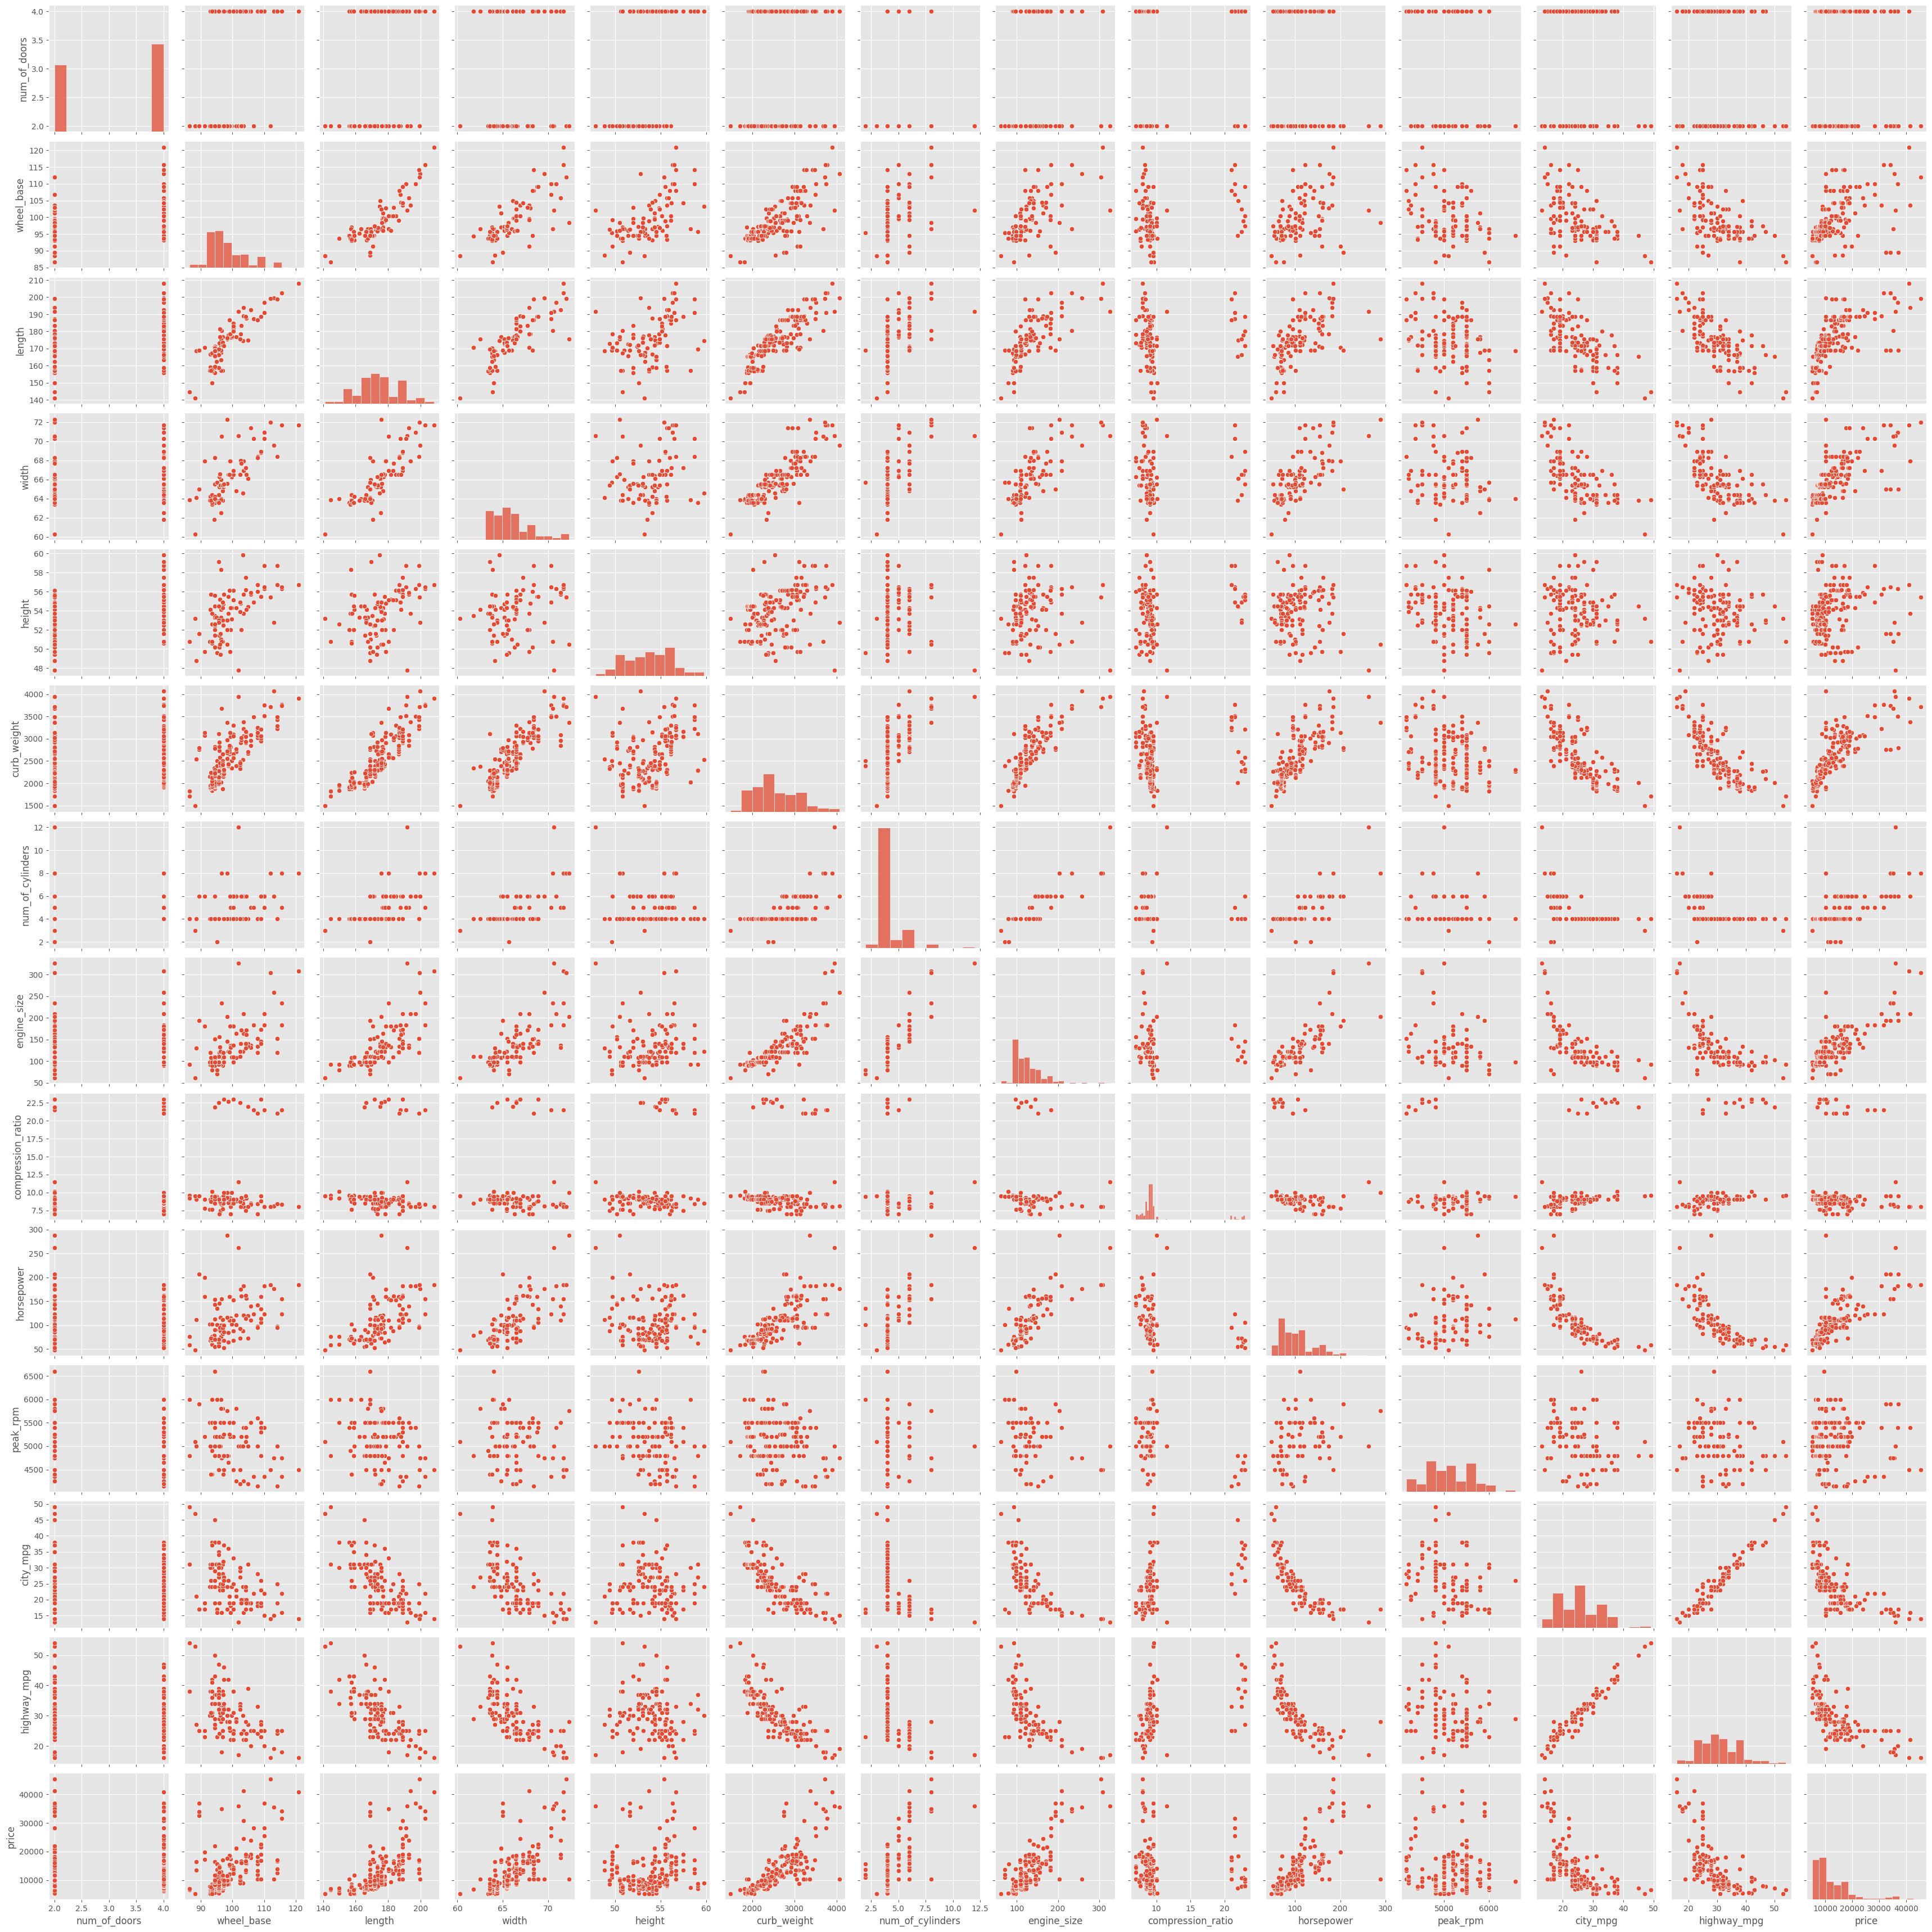

In [377]:
sns.pairplot(df)